## Over/Under - Evaluating our Edge
- ### In this notebook, we repeat the evaluation of the over/under model but with a larger test set
- ### We will then do some simulations to see what kinds of profit we could expect (assuming our edge is real)

In [1]:
## Upgrade to the latest version of structureboost
## should be >= 0.4.1
## !pip install --upgrade structureboost 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import structureboost as stb
import ml_insights as mli
import scipy as sp

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [3]:
stb.__version__

'0.4.1'

In [4]:
df=pd.read_csv('df_bp9.csv')
df_runs=pd.read_csv('df_runs_bp11.csv')

/Users/brianlucena/.pyenv/versions/3.9.13/envs/ds3913/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (13,14,15,19,85,87,159,206) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/brianlucena/.pyenv/versions/3.9.13/envs/ds3913/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.over_under_line.max()

15.0

In [6]:
df_runs['runs_trunc'] = np.minimum(df_runs['runs'],16)

In [7]:
# Let's modify this part to make the test set bigger

df_train = df_runs[(df_runs.season>1980) & (df_runs.season<=2017) & ~(df_runs.OBP_162.isnull())]
df_valid = df_runs[(df_runs.season>=2018) & (df_runs.season<=2018)]
df_test = df_runs[df_runs.season>=2019]

df_test_game = df[df.season>=2019]

## Begin Modeling

In [8]:
df_runs.head()

,season,date,dblheader_code,date_dblhead,team_h,team_v,league_h,league_v,over_under_line,over_under_result,ballpark_id,day_night,runs,BATAVG_30,OBP_30,SLG_30,OBS_30,ERR_30,SB_30,CS_30,BATAVG_162,OBP_162,SLG_162,OBS_162,ERR_162,SB_162,CS_162,lineup8_BATAVG_30,lineup9_BATAVG_30,lineup8_BATAVG_30_w,lineup9_BATAVG_30_w,lineup8_OBP_30,lineup9_OBP_30,lineup8_OBP_30_w,lineup9_OBP_30_w,lineup8_SLG_30,lineup9_SLG_30,lineup8_SLG_30_w,lineup9_SLG_30_w,lineup8_OBS_30,lineup9_OBS_30,lineup8_OBS_30_w,lineup9_OBS_30_w,lineup8_SLGmod_30,lineup9_SLGmod_30,lineup8_SLGmod_30_w,lineup9_SLGmod_30_w,lineup8_SObat_perc_30,lineup9_SObat_perc_30,lineup8_SObat_perc_30_w,lineup9_SObat_perc_30_w,lineup8_BATAVG_75,lineup9_BATAVG_75,lineup8_BATAVG_75_w,lineup9_BATAVG_75_w,lineup8_OBP_75,lineup9_OBP_75,lineup8_OBP_75_w,lineup9_OBP_75_w,lineup8_SLG_75,lineup9_SLG_75,lineup8_SLG_75_w,lineup9_SLG_75_w,lineup8_OBS_75,lineup9_OBS_75,lineup8_OBS_75_w,lineup9_OBS_75_w,lineup8_SLGmod_75,lineup9_SLGmod_75,lineup8_SLGmod_75_w,lineup9_SLGmod_75_w,lineup8_SObat_perc_75,lineup9_SObat_perc_75,lineup8_SObat_perc_75_w,lineup9_SObat_perc_75_w,lineup8_BATAVG_162,lineup9_BATAVG_162,lineup8_BATAVG_162_w,lineup9_BATAVG_162_w,lineup8_OBP_162,lineup9_OBP_162,lineup8_OBP_162_w,lineup9_OBP_162_w,lineup8_SLG_162,lineup9_SLG_162,lineup8_SLG_162_w,lineup9_SLG_162_w,lineup8_OBS_162,lineup9_OBS_162,lineup8_OBS_162_w,lineup9_OBS_162_w,lineup8_SLGmod_162,lineup9_SLGmod_162,lineup8_SLGmod_162_w,lineup9_SLGmod_162_w,lineup8_SObat_perc_162,lineup9_SObat_perc_162,lineup8_SObat_perc_162_w,lineup9_SObat_perc_162_w,lineup8_BATAVG_350,lineup9_BATAVG_350,lineup8_BATAVG_350_w,lineup9_BATAVG_350_w,lineup8_OBP_350,lineup9_OBP_350,lineup8_OBP_350_w,lineup9_OBP_350_w,lineup8_SLG_350,lineup9_SLG_350,lineup8_SLG_350_w,lineup9_SLG_350_w,lineup8_OBS_350,lineup9_OBS_350,lineup8_OBS_350_w,lineup9_OBS_350_w,lineup8_SLGmod_350,lineup9_SLGmod_350,lineup8_SLGmod_350_w,lineup9_SLGmod_350_w,lineup8_SObat_perc_350,lineup9_SObat_perc_350,lineup8_SObat_perc_350_w,lineup9_SObat_perc_350_w,Strt_ERA_10,Strt_WHIP_10,Strt_SO_perc_10,Strt_H_BB_perc_10,Strt_TB_BB_perc_10,Strt_FIP_10,Strt_FIP_perc_10,Strt_ERA_35,Strt_WHIP_35,Strt_SO_perc_35,Strt_H_BB_perc_35,Strt_TB_BB_perc_35,Strt_FIP_35,Strt_FIP_perc_35,Strt_ERA_75,Strt_WHIP_75,Strt_SO_perc_75,Strt_H_BB_perc_75,Strt_TB_BB_perc_75,Strt_FIP_75,Strt_FIP_perc_75,Bpen_WHIP_10,Bpen_SO_perc_10,Bpen_H_BB_perc_10,Bpen_TB_BB_perc_10,Bpen_WHIP_35,Bpen_SO_perc_35,Bpen_H_BB_perc_35,Bpen_TB_BB_perc_35,Bpen_WHIP_75,Bpen_SO_perc_75,Bpen_H_BB_perc_75,Bpen_TB_BB_perc_75,home_hitting,runs_trunc
0,1980,19800409,0,198004090,SEA,TOR,AL,AL,0.0,NaN,SEA02,N,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258957,0.244999,0.261081,0.248690,0.316389,0.299753,0.318195,0.303498,0.391599,0.366607,0.393452,0.371455,0.707988,0.666360,0.711647,0.674953,0.302610,0.283802,0.301660,0.285333,0.103902,0.099765,0.103370,0.099810,0.247605,0.241513,0.247225,0.241943,0.302829,0.293223,0.301952,0.293652,0.357380,0.344445,0.356761,0.345529,0.660209,0.637667,0.658713,0.639181,0.277352,0.272526,0.275707,0.271654,0.101148,0.107454,0.100206,0.105801,0.236959,0.232164,0.235594,0.231540,0.293375,0.284567,0.291567,0.284053,0.341385,0.330441,0.339080,0.329750,0.634760,0.615009,0.630646,0.613803,0.271778,0.267889,0.269267,0.266116,0.101146,0.108100,0.099922,0.106111,0.207199,0.203860,0.206608,0.203750,0.259931,0.254701,0.258950,0.254479,0.296881,0.288656,0.295494,0.288449,0.556812,0.543357,0.554444,0.542928,0.243524,0.242021,0.241553,0.240432,0.092185,0.098451,0.091244,0.096804,5.692771,1.572289,0.104418,0.349398,0.502008,5.186747,1.152610,3.857143,1.357945,0.115165,0.321551,0.434436,4.040128,0.956670,4.644315,1.460641,0.098187,0.336354,0.459215,4.723032,1.087613,1.5,0.2,0.37,0.45,1.5,0.2,0.37,0.45,1.5,0.2,0.37,0.45,1,8
1,1980,19800409,0,198004090,CIN,ATL,NL,NL,0.0,NaN,CIN08,D,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291169,0.266224,0.291499,0.269692,0.358840,0.326376,0.359266,0.330886,0.443534,

In [9]:
feat_set = ['OBP_162',
 'SLG_162',
 'Strt_WHIP_35',
 'Strt_TB_BB_perc_35',
 'Strt_H_BB_perc_35',
 'Strt_SO_perc_10',
 'Bpen_WHIP_75',
 'Bpen_TB_BB_perc_75',
 'Bpen_H_BB_perc_75',
 'Bpen_SO_perc_75',
 'Bpen_WHIP_35',
 'Bpen_TB_BB_perc_35',
 'Bpen_H_BB_perc_35',
 'Bpen_SO_perc_35',
 'Bpen_WHIP_10',
 'Bpen_TB_BB_perc_10',
 'Bpen_H_BB_perc_10',
 'Bpen_SO_perc_10',
 'lineup9_OBP_162',
 'lineup9_SLG_162',
 'home_hitting']

In [10]:
bpv2 = np.linspace(-.5,16.5,18)
bpv2

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5])

In [11]:
# def try_features_runs(feat_set, max_depth=2):
target = 'runs_trunc'
X_train = df_train.loc[:,feat_set]
X_valid = df_valid.loc[:,feat_set]
X_test = df_test.loc[:,feat_set]

y_train = df_train[target].to_numpy()
y_valid = df_valid[target].to_numpy()
y_test = df_test[target].to_numpy()

In [12]:
cr1 = stb.Coarsage(num_trees = 1000, learning_rate=.02, max_depth=4,
                  binpt_method = 'fixed', 
               binpt_vec=bpv2)
cr1.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stop_past_steps=5, eval_freq=10)

i=0, eval_set_loss = 2.450081089595537
i=10, eval_set_loss = 2.447107988672426
i=20, eval_set_loss = 2.445008736744186
i=30, eval_set_loss = 2.443286205192367
i=40, eval_set_loss = 2.442049299572408
i=50, eval_set_loss = 2.4411175578363085
i=60, eval_set_loss = 2.440390419333943
i=70, eval_set_loss = 2.439691800268975
i=80, eval_set_loss = 2.439257161944291
i=90, eval_set_loss = 2.43894099780196
i=100, eval_set_loss = 2.438624525589298
i=110, eval_set_loss = 2.438399127575096
i=120, eval_set_loss = 2.4382122749531887
i=130, eval_set_loss = 2.4380795607267287
i=140, eval_set_loss = 2.438019081540528
i=150, eval_set_loss = 2.437995791102163
i=160, eval_set_loss = 2.4379167435026496
i=170, eval_set_loss = 2.437874711927759
i=180, eval_set_loss = 2.437820352678816
i=190, eval_set_loss = 2.4377820527975604
i=200, eval_set_loss = 2.437783458034294
i=210, eval_set_loss = 2.437794324904819
i=220, eval_set_loss = 2.437785519034382
i=230, eval_set_loss = 2.437801912032567
i=240, eval_set_loss = 

In [13]:
preds_test = cr1.predict_distributions(X_test)

In [14]:
preds_test.log_loss(y_test)

2.449423876894857

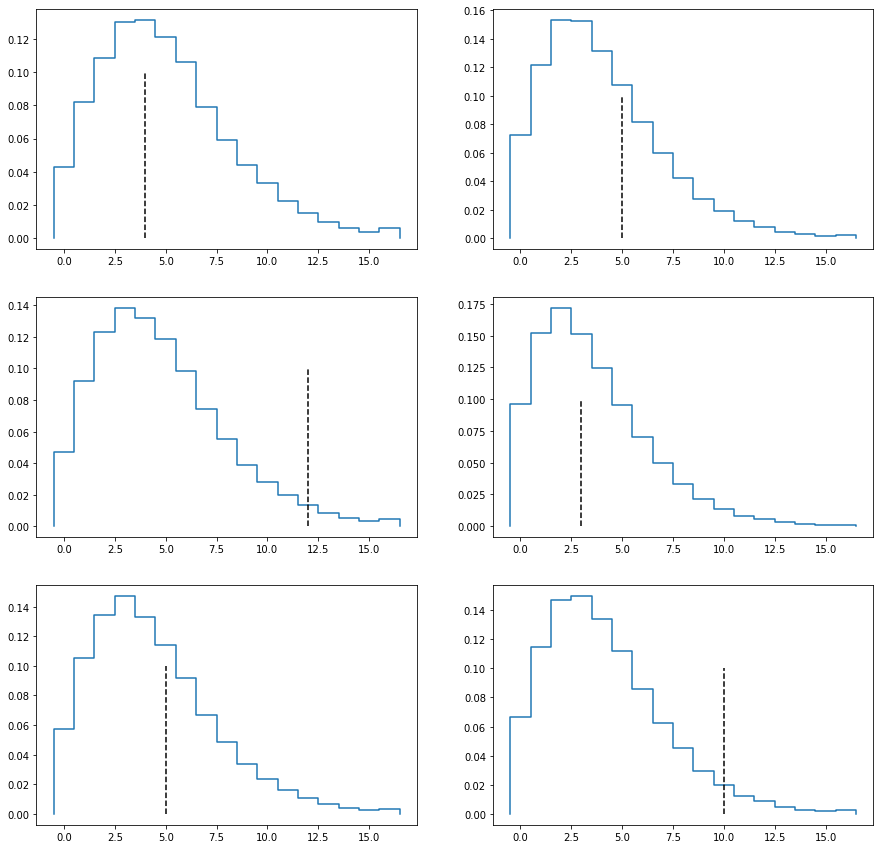

In [15]:
plt.figure(figsize=(15,15))
for i in range(1,7):
    plt.subplot(3,2,i)
    preds_test[i].plot_density()
    plt.vlines(x=y_test[i], ymin=0,ymax=.1, color='k', linestyle='--')

## Predicting the Over / Under
- ### As a first step, we will model the total score as an **independent** sum of the two scores
- ### For baseball, this is not a terrible assumption (would be worse in other sports)
- ### Still, would expect some imperfection, since teams make strategic decisions based on the score of the game
    - ### Play for one run in a close game
    - ### Put a rookie pitcher in with a big lead

In [16]:
def probs_oup_val(probvec_a, probvec_b, val, ties_go_over=True):
    """given two probability distributions and the ou-line, returns prob of under"""
    val_up = int(np.ceil(val))
    val_down = int(np.floor(val))
    cdf_b = np.cumsum(probvec_b)
    prob_under = 0
    prob_push = 0
    if (val_down<val_up): # This means we have a decimal (.5) o/u value - no pushes      
        for i in range(0, val_down+1):
            # calculate prob that we are less than or equal to val_down for each
            # value of probvec_a between 0 and val_down
            prob_under += probvec_a[i] * cdf_b[val_down-i]
        return(1-prob_under-prob_push, prob_under, prob_push)
    else: # This means val_down == val_up == val and we have an integer line so pushes are possible
        for i in range(0, val_down):
            # calculate prob that we are less than or equal to val_down-1 for each
            # value of probvec_a between 0 and val_down
            prob_under += probvec_a[i] * cdf_b[val_down-1-i]
        for j in range(0, val_down+1):
            # calculate prob that we are exactly = val_down
            if (not ties_go_over) or (j != val_down-j): # if line is 10 and predicts score of 5-5, maybe count as over
                prob_push += probvec_a[j] * probvec_b[val_down-j] 
        return(1-prob_under-prob_push, prob_under,  prob_push)

In [17]:
num_games_test=int(df_test.shape[0]/2)

In [18]:
oup_probs = np.array([probs_oup_val(preds_test[i].probvec, preds_test[i+num_games_test].probvec, df_test.over_under_line.iloc[i])
                        for i in range(num_games_test)])

In [19]:
oup_probs.mean(axis=0)

array([0.43703465, 0.5225087 , 0.04045666])

In [20]:
df_test.over_under_result.value_counts().sum(), df_test.over_under_result.value_counts()/df_test.over_under_result.value_counts().sum()

(16358,
 U    0.482333
 O    0.468639
 P    0.049028
 Name: over_under_result, dtype: float64)

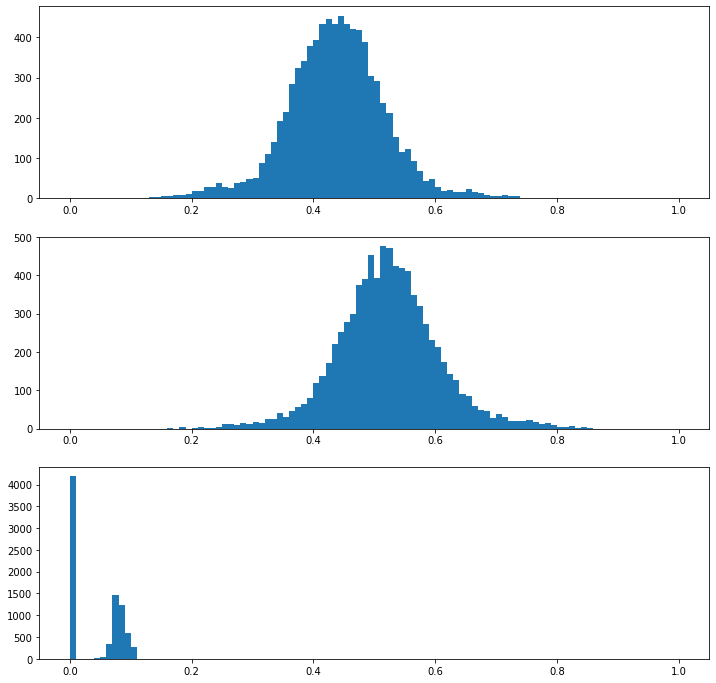

In [21]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.hist(oup_probs[:,0], np.linspace(0,1,101));
plt.subplot(3,1,2)
plt.hist(oup_probs[:,1], np.linspace(0,1,101));
plt.subplot(3,1,3)
plt.hist(oup_probs[:,2], np.linspace(0,1,101));

In [22]:
def evaluate_edge_probs(oupmat, edge, test_df_w_ouline):
    bet_under = (oupmat[:,1]/(oupmat[:,0] + oupmat[:,1])) > (.5 + edge)
    bet_over = (oupmat[:,0]/(oupmat[:,0] + oupmat[:,1])) > (.5 + edge)
    num_cases_under = np.sum(bet_under)
    num_cases_over = np.sum(bet_over)
    num_cases_total = num_cases_under + num_cases_over
    num_under_correct = (test_df_w_ouline.loc[bet_under,'over_under_result']=='U').sum()
    num_under_push = (test_df_w_ouline.loc[bet_under,'over_under_result']=='P').sum()
    num_over_correct = (test_df_w_ouline.loc[bet_over,'over_under_result']=='O').sum()
    num_over_push = (test_df_w_ouline.loc[bet_over,'over_under_result']=='P').sum()
    num_correct = num_under_correct + num_over_correct
    num_pushes = num_under_push + num_over_push
    num_incorrect = num_cases_total -num_correct - num_pushes
    pct_correct = num_correct / num_cases_total
    pct_pushes = num_pushes / num_cases_total
    pct_incorrect = num_incorrect / num_cases_total
    pct_under_correct = num_under_correct/num_cases_under
    pct_under_push = num_under_push/num_cases_under
    pct_over_correct = num_over_correct/num_cases_over
    pct_over_push = num_over_push/num_cases_over
    print(f'\nThere were {num_cases_total} games that met criteria of edge > {edge} ({num_cases_under} unders and {num_cases_over} overs)')
    print(f'Of them {num_correct} ({np.round(pct_correct,3)}) were correct (winning bets), ({num_under_correct} unders and {num_over_correct} overs) ')
    print(f'and {num_pushes} ({np.round(pct_pushes,3)}) were Pushes ({num_under_push} unders and {num_over_push} overs)')
    print(f'and {num_incorrect} ({np.round(pct_incorrect,3)}) were incorrect (losing bets))')
    winning_edge_m110 = pct_correct*1 + pct_incorrect*(-1.1)
    win_total_m110 = num_correct*1 + num_incorrect*(-1.1)
    print(f'Betting the Under at a line of -110, your profit would have been {np.round(winning_edge_m110,4)} per bet')
    print(f'\t for a total profit of {np.round(win_total_m110,2)} across all {num_cases_total} bets')
    print('\n')
    

In [23]:
for i in np.linspace(.25, .05,5):
    print(f'threshold = {i}')
    evaluate_edge_probs(oup_probs, i, df_test_game)


threshold = 0.25

There were 160 games that met criteria of edge > 0.25 (149 unders and 11 overs)
Of them 86 (0.538) were correct (winning bets), (81 unders and 5 overs) 
and 8 (0.05) were Pushes (6 unders and 2 overs)
and 66 (0.412) were incorrect (losing bets))
Betting the Under at a line of -110, your profit would have been 0.0837 per bet
	 for a total profit of 13.4 across all 160 bets


threshold = 0.2

There were 362 games that met criteria of edge > 0.2 (304 unders and 58 overs)
Of them 197 (0.544) were correct (winning bets), (165 unders and 32 overs) 
and 18 (0.05) were Pushes (12 unders and 6 overs)
and 147 (0.406) were incorrect (losing bets))
Betting the Under at a line of -110, your profit would have been 0.0975 per bet
	 for a total profit of 35.3 across all 362 bets


threshold = 0.15

There were 798 games that met criteria of edge > 0.15 (659 unders and 139 overs)
Of them 407 (0.51) were correct (winning bets), (339 unders and 68 overs) 
and 37 (0.046) were Pushes (30 u

In [24]:
def evaluate_lkratio(nc, ni, null_prob, alt_prob):
    null_lk = sp.stats.binom.pmf(nc,nc+ni,null_prob)
    alt_lk = sp.stats.binom.pmf(nc,nc+ni,alt_prob)
    return(alt_lk/null_lk)

In [25]:
evaluate_lkratio(86, 66, .5, 86/(86+66))

3.741971935747073

In [26]:
evaluate_lkratio(197, 147, .5, 197/(197+147))

38.345025032134195

In [27]:
evaluate_lkratio(407, 354, .5, 407/(407+354))

6.34135709173781

In [28]:
evaluate_lkratio(1020, 960, .5, 1020/(1020+960))

2.4824105711719704

In [29]:
def_prob = 0.482333/(0.482333+0.468639)
def_prob

0.5072000016824891

In [30]:
evaluate_lkratio(197, 147, def_prob, 197/(197+147))

19.341334470347018

In [32]:
mid_prob = (def_prob+(197/(197+147)))/2
mid_prob

0.5399372101435702

In [33]:
197/(197+147)

0.5726744186046512

In [34]:
evaluate_lkratio(197, 147, def_prob, mid_prob)

9.179790352860659

In [ ]:
197/(197+147)

## Let's simulate the future
- #### Assume we can be "right" 57.2\% of the time
- #### How much can we expect to make betting for an entire season?
- #### How likely is it that we would lose money?

In [35]:
df_test_game.season.value_counts()

2019    2429
2022    2427
2021    2425
2020     898
Name: season, dtype: int64

In [36]:
pct_games_to_bet = 362/16358
num_games_in_season = 2430
pct_games_to_bet, pct_games_to_bet*num_games_in_season

(0.022129844724293923, 53.77552268003423)

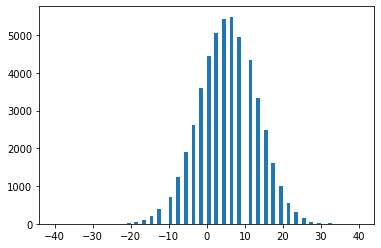

In [37]:
num_games_bet = 53
betting_wins = np.random.binomial(n=num_games_bet, p=.572, size=50000)
betting_losses = num_games_bet-betting_wins
amount_won = betting_wins -1.1*betting_losses
plt.hist(amount_won, np.linspace(-40,40,81));

In [38]:
np.mean(amount_won<0)

0.21674

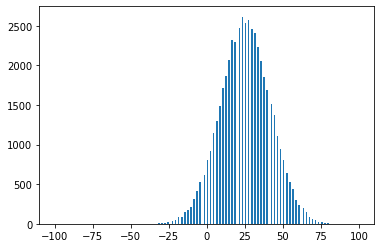

In [39]:
num_games_bet = 250
betting_wins = np.random.binomial(n=num_games_bet, p=.572, size=50000)
betting_losses = num_games_bet-betting_wins
amount_won = betting_wins -1.1*betting_losses
plt.hist(amount_won, np.linspace(-100,100,201));

In [40]:
np.mean(amount_won<0)

0.05438

## Conclusions
- ### Profit is small relative to the amounts bet
- ### Even with edge, still reasonable chance of losing money!
- ### Good news - this was our first stab at a model!  Lots of ways to improve
- ### Bad news - potential that this model could be off (rule changes, etc)

## Possible Next Steps
- ### Explore calibration / validity of team level run-prediction
- ### Build model for Under/Over/Push rather than relying on independence assumption (make features out of the probability distributions)
- ### Generally improve runs scored model (feature selection, hyper-parameter tuning, etc.)
- ### Use the runs scored model to develop features for predicting the winner (against moneyline)
- ### Predict run "differential" and use that to predict winner (against moneyline)
- ### See if runs scored models can help us bet on the spread (like point spreads in football)